In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
crime = pd.read_csv('/home/sushil/Documents/Assingment/Clust-Ass7/crime_data.csv')

In [51]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([ 0.8 ,  2.46,  4.12,  5.78,  7.44,  9.1 , 10.76, 12.42, 14.08,
        15.74, 17.4 ]),
 <BarContainer object of 10 artists>)

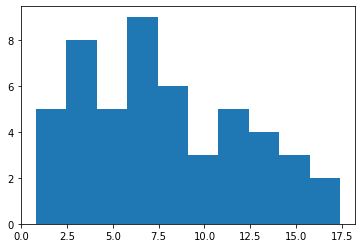

In [52]:
plt.hist(crime.Murder)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b9dc6a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b9dc750d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b9dc6a670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b9dc75790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b9dc75af0>],
 'means': []}

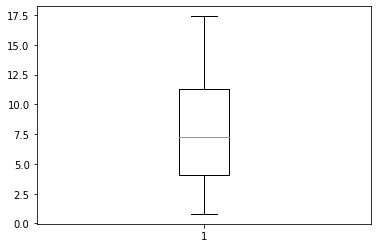

In [53]:
plt.boxplot(crime.Murder)

(array([7., 4., 9., 7., 4., 3., 4., 6., 4., 2.]),
 array([ 45. ,  74.2, 103.4, 132.6, 161.8, 191. , 220.2, 249.4, 278.6,
        307.8, 337. ]),
 <BarContainer object of 10 artists>)

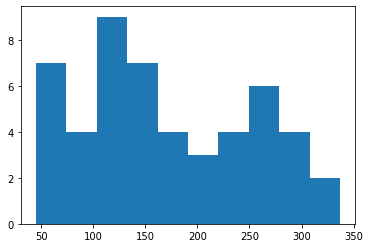

In [54]:
plt.hist(crime.Assault)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b9dbf28b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b9dbf2f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b9dbf2550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b9dbfc670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b9dbfc9d0>],
 'means': []}

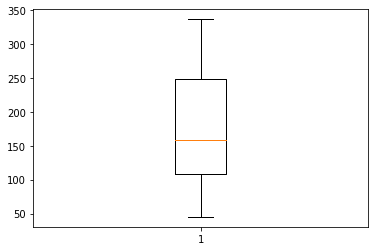

In [55]:
plt.boxplot(crime.Assault)

(array([1., 1., 6., 5., 6., 9., 6., 4., 8., 4.]),
 array([32. , 37.9, 43.8, 49.7, 55.6, 61.5, 67.4, 73.3, 79.2, 85.1, 91. ]),
 <BarContainer object of 10 artists>)

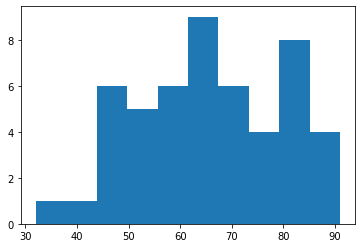

In [56]:
plt.hist(crime.UrbanPop)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b9db7a370>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b9db7a940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b9db7a070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b9db02040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b9db023a0>],
 'means': []}

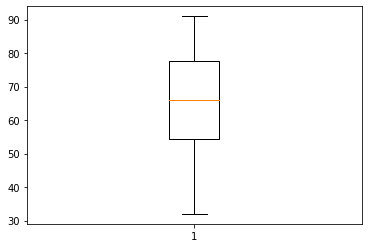

In [57]:
plt.boxplot(crime.UrbanPop)

(array([ 7.,  6., 10.,  9.,  6.,  4.,  3.,  1.,  2.,  2.]),
 array([ 7.3 , 11.17, 15.04, 18.91, 22.78, 26.65, 30.52, 34.39, 38.26,
        42.13, 46.  ]),
 <BarContainer object of 10 artists>)

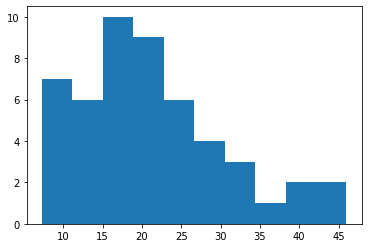

In [58]:
plt.hist(crime.Rape)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b9da826a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b9da82d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b9da82340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b9da8c460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b9da8c7c0>],
 'means': []}

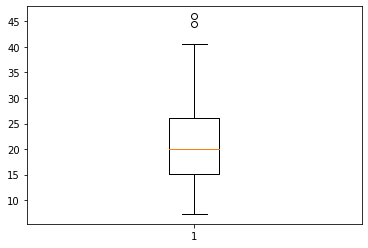

In [59]:
plt.boxplot(crime.Rape)

In [60]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [75]:
def_norm = norm_fun(crime.iloc[:,1:])

In [76]:
def_norm.head()

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,0.0
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,1.0


In [64]:
type(def_norm)

pandas.core.frame.DataFrame

In [65]:
from scipy.cluster.hierarchy import linkage

In [66]:
import scipy.cluster.hierarchy as sch

In [67]:
z = linkage(def_norm,method = "complete",metric = "euclidean")

In [68]:
z

array([[2.67800000e+03, 2.67900000e+03, 4.50831038e-04, 2.00000000e+00],
       [4.06000000e+02, 4.08000000e+02, 7.15642994e-04, 2.00000000e+00],
       [1.02000000e+02, 1.04000000e+02, 8.34221398e-04, 2.00000000e+00],
       ...,
       [7.98900000e+03, 7.99100000e+03, 2.08866499e+00, 2.52800000e+03],
       [7.96500000e+03, 7.99300000e+03, 2.25309898e+00, 1.47100000e+03],
       [7.99400000e+03, 7.99500000e+03, 2.44189547e+00, 3.99900000e+03]])

Text(0.5, 0, 'index')

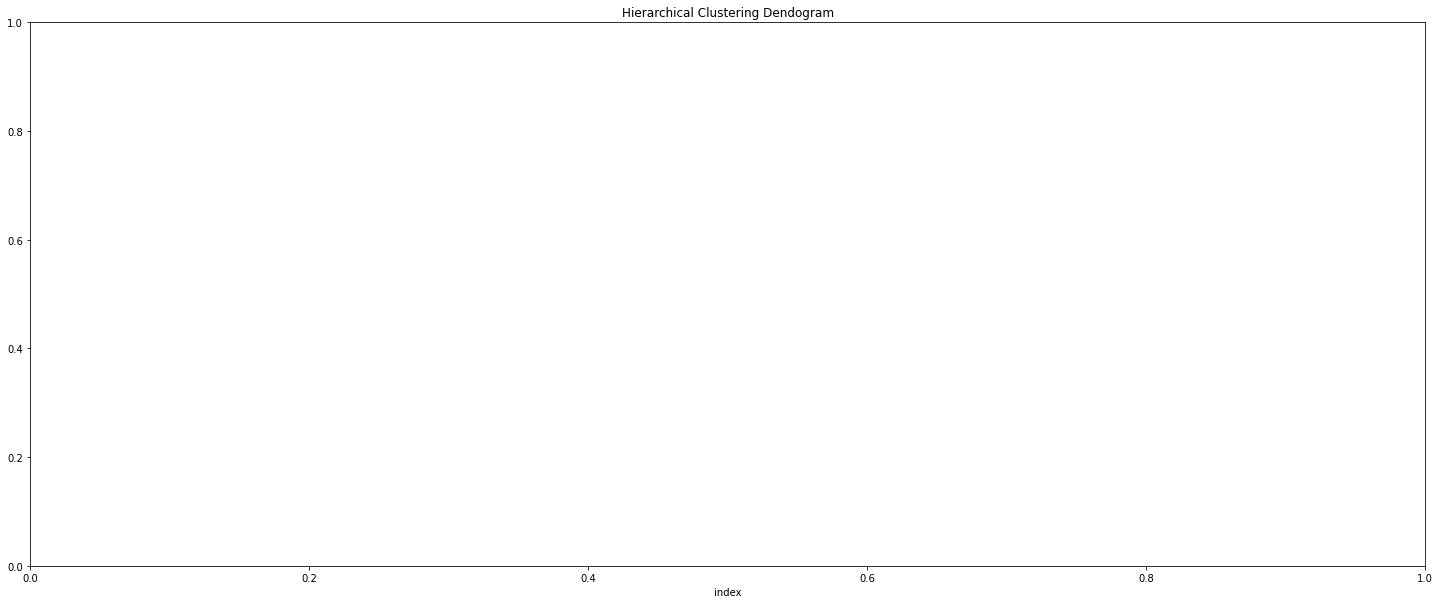

In [69]:
plt.figure(figsize = (25,10));plt.title('Hierarchical Clustering Dendogram');plt.xlabel('index')

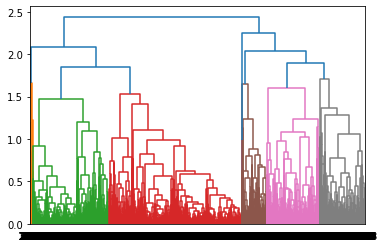

In [70]:
sch.dendrogram(
                z,
                leaf_rotation=0,
                leaf_font_size=10
)
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
h_complete= AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(def_norm)

In [73]:
cluster_labels=pd.Series(h_complete.labels_)
crime['clust']=cluster_labels

In [77]:
crime=crime.iloc[:,[5,0,1,2,3,4]]

In [79]:
crime.head()

,clust,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6


In [80]:
airline.iloc[:,2:].groupby(cfrime.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
